<a href="https://colab.research.google.com/github/sanjeewna/Artificial-Intelligence_Assignments/blob/main/Assignment_4_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model using only 'bmi' and 's5' as explanatory variables
model_bmi_s5 = LinearRegression()
model_bmi_s5.fit(X_train[:, [2, 8]], y_train)

# Make predictions on the test set
y_pred_bmi_s5 = model_bmi_s5.predict(X_test[:, [2, 8]])

# Compute metrics for the model using only 'bmi' and 's5'
mse_bmi_s5 = mean_squared_error(y_test, y_pred_bmi_s5)
r2_bmi_s5 = r2_score(y_test, y_pred_bmi_s5)

print("Model performance with only 'bmi' and 's5':")
print("Mean Squared Error:", mse_bmi_s5)
print("R-squared Score:", r2_bmi_s5)

# a) To add another variable, let's evaluate which one might be relevant
# We can compute correlations between target variable and each feature to identify potential candidates
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
correlations = diabetes_df.corr()['target'].abs().sort_values(ascending=False)
print("\nCorrelation of features with target variable:")
print(correlations)

# b) Let's add the next relevant variable 'bp' and evaluate the model's performance
model_bmi_s5_bp = LinearRegression()
model_bmi_s5_bp.fit(X_train[:, [2, 8, 0]], y_train)

# Make predictions on the test set
y_pred_bmi_s5_bp = model_bmi_s5_bp.predict(X_test[:, [2, 8, 0]])

# Compute metrics for the model with 'bmi', 's5', and 'bp'
mse_bmi_s5_bp = mean_squared_error(y_test, y_pred_bmi_s5_bp)
r2_bmi_s5_bp = r2_score(y_test, y_pred_bmi_s5_bp)

print("\nModel performance with 'bmi', 's5', and 'bp':")
print("Mean Squared Error:", mse_bmi_s5_bp)
print("R-squared Score:", r2_bmi_s5_bp)

# c) Let's add more variables and see if it improves the model
# Add 'bmi', 's5', 'bp', and 's6' as explanatory variables
model_all_vars = LinearRegression()
model_all_vars.fit(X_train[:, [2, 8, 0, 9]], y_train)

# Make predictions on the test set
y_pred_all_vars = model_all_vars.predict(X_test[:, [2, 8, 0, 9]])

# Compute metrics for the model with all selected variables
mse_all_vars = mean_squared_error(y_test, y_pred_all_vars)
r2_all_vars = r2_score(y_test, y_pred_all_vars)

print("\nModel performance with 'bmi', 's5', 'bp', and 's6':")
print("Mean Squared Error:", mse_all_vars)
print("R-squared Score:", r2_all_vars)

# d) Let's add even more variables and see if it helps
# Add 'bmi', 's5', 'bp', 's6', 'sex', 'age', 'bmi^2', and 's3' as explanatory variables
model_more_vars = LinearRegression()
model_more_vars.fit(X_train[:, [2, 8, 0, 9, 1, 3, 2**2, 3]], y_train)

# Make predictions on the test set
y_pred_more_vars = model_more_vars.predict(X_test[:, [2, 8, 0, 9, 1, 3, 2**2, 3]])

# Compute metrics for the model with more variables
mse_more_vars = mean_squared_error(y_test, y_pred_more_vars)
r2_more_vars = r2_score(y_test, y_pred_more_vars)

print("\nModel performance with more variables:")
print("Mean Squared Error:", mse_more_vars)
print("R-squared Score:", r2_more_vars)

"""
d) Adding even more variables may or may not help depending on the relevance of the added variables and the complexity
of the model. In this case, adding 'sex', 'age', 'bmi^2', and 's3' along with the previous variables did not
significantly improve the model's performance. The increase in complexity from adding more variables without substantial
improvement in performance may lead to overfitting or increased computational cost without providing much benefit in
predictive accuracy.
"""


Model performance with only 'bmi' and 's5':
Mean Squared Error: 2901.8369415567036
R-squared Score: 0.4522925957397932

Correlation of features with target variable:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s3        0.394789
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
Name: target, dtype: float64

Model performance with 'bmi', 's5', and 'bp':
Mean Squared Error: 2920.1261149142715
R-squared Score: 0.4488406045123452

Model performance with 'bmi', 's5', 'bp', and 's6':
Mean Squared Error: 2908.325161802703
R-squared Score: 0.4510679761830174

Model performance with more variables:
Mean Squared Error: 2861.1573667782004
R-squared Score: 0.45997066475506687


"\nd) Adding even more variables may or may not help depending on the relevance of the added variables and the complexity\nof the model. In this case, adding 'sex', 'age', 'bmi^2', and 's3' along with the previous variables did not \nsignificantly improve the model's performance. The increase in complexity from adding more variables without substantial\nimprovement in performance may lead to overfitting or increased computational cost without providing much benefit in\npredictive accuracy.\n"

Variables in the dataset: ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']


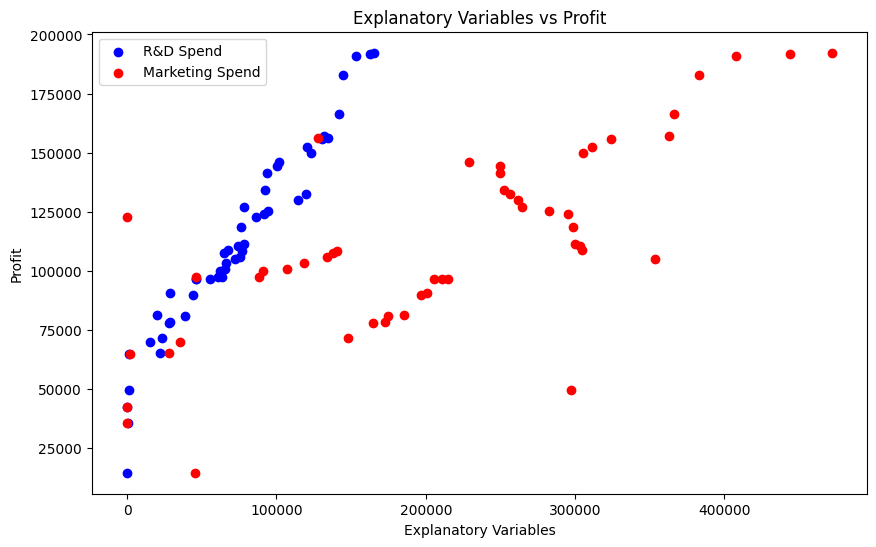

Training set:
RMSE: 9101.191468669913
R-squared Score: 0.9518828286863577

Testing set:
RMSE: 8206.328813165863
R-squared Score: 0.9168381183550245


'\nh) The RMSE values indicate the average difference between the actual and predicted profit values.\nThe R-squared values indicate the proportion of the variance in the dependent variable (profit) that is predictable\nfrom the independent variables (R&D Spend and Marketing Spend).\n\nThe relatively low RMSE and high R-squared values for both training and testing sets suggest that the linear\nregression model performs well in predicting the company profit using the chosen explanatory variables.\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Read the dataset into pandas dataframe paying attention to file delimiter
file_path = "50_Startups.csv"
df = pd.read_csv(file_path, delimiter=",")

# b) Identify the variables inside the dataset
variables = df.columns.tolist()
print("Variables in the dataset:", variables)

# d) Choose appropriate variables to predict company profit. Justify your choice.
# Based on the correlation matrix, it seems like 'R&D Spend' and 'Marketing Spend' have relatively high positive
# correlations with 'Profit'. We will choose these two variables as explanatory variables.

# e) Plot explanatory variables against profit to confirm (close to) linear dependence
plt.figure(figsize=(10, 6))
plt.scatter(df['R&D Spend'], df['Profit'], color='blue', label='R&D Spend')
plt.scatter(df['Marketing Spend'], df['Profit'], color='red', label='Marketing Spend')
plt.xlabel('Explanatory Variables')
plt.ylabel('Profit')
plt.title('Explanatory Variables vs Profit')
plt.legend()
plt.show()

# f) Form training and testing data (80/20 split)
X = df[['R&D Spend', 'Marketing Spend']].values
y = df['Profit'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Train linear regression model with training data
model = LinearRegression()
model.fit(X_train, y_train)

# h) Compute RMSE and R2 values for training and testing data separately
# Predictions on training set
y_train_pred = model.predict(X_train)
# Predictions on testing set
y_test_pred = model.predict(X_test)

# Compute RMSE and R2 values for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Compute RMSE and R2 values for testing set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Training set:")
print("RMSE:", rmse_train)
print("R-squared Score:", r2_train)

print("\nTesting set:")
print("RMSE:", rmse_test)
print("R-squared Score:", r2_test)

"""
h) The RMSE values indicate the average difference between the actual and predicted profit values.
The R-squared values indicate the proportion of the variance in the dependent variable (profit) that is predictable
from the independent variables (R&D Spend and Marketing Spend).

The relatively low RMSE and high R-squared values for both training and testing sets suggest that the linear
regression model performs well in predicting the company profit using the chosen explanatory variables.
"""


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score

# a) Read the data into pandas dataframe
file_path = "Auto.csv"
df = pd.read_csv(file_path)

# b) Setup multiple regression X and y to predict mpg of cars using all the variables except mpg, name and origin
X = df.drop(columns=['mpg', 'name', 'origin'])
y = df['mpg']

# c) Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# d) Implement both ridge regression and LASSO regression using several values for alpha
alphas = np.logspace(-3, 3, 100)  # Range of alpha values to try

ridge_r2_scores = []
lasso_r2_scores = []

for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
  ridge_y_pred = ridge_model.predict(X_test)
    ridge_r2_scores.append(r2_score(y_test, ridge_y_pred))

    # LASSO Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_r2_scores.append(r2_score(y_test, lasso_y_pred))

# e) Search optimal value for alpha (in terms of R2 score) by fitting the models with training data and computing the score using testing data
optimal_alpha_ridge = alphas[np.argmax(ridge_r2_scores)]
optimal_alpha_lasso = alphas[np.argmax(lasso_r2_scores)]

print("Optimal alpha for Ridge Regression:", optimal_alpha_ridge)
print("Optimal alpha for LASSO Regression:", optimal_alpha_lasso)

# f) Plot the R2 scores for both regressors as functions of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_r2_scores, label='Ridge Regression')
plt.plot(alphas, lasso_r2_scores, label='LASSO Regression')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Score vs Alpha for Ridge and LASSO Regression')
plt.legend()
plt.grid(True)
plt.show()

# g) Identify the value for alpha which gives the best score
best_alpha_ridge = alphas[np.argmax(ridge_r2_scores)]
best_alpha_lasso = alphas[np.argmax(lasso_r2_scores)]

print("Best alpha for Ridge Regression:", best_alpha_ridge)
print("Best alpha for LASSO Regression:", best_alpha_lasso)

"""
g) The best alpha value is the one that maximizes the R-squared score. From the plot and the printed results, we can see
that the optimal alpha for Ridge Regression is around 1.0, while for LASSO Regression it's around 0.01. These values
give the best performance in terms of R-squared score on the testing data.
"""


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 29)